# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/listings.csv.gz')

## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Missing values per column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       48
neighborhood_overview                            980
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          3
host_since                                         3
host_location                                    463
host_about                                      1000
host_response_time                               365
host_response_rate                               365
host_acceptance_rate                             250
host_is_superhost  

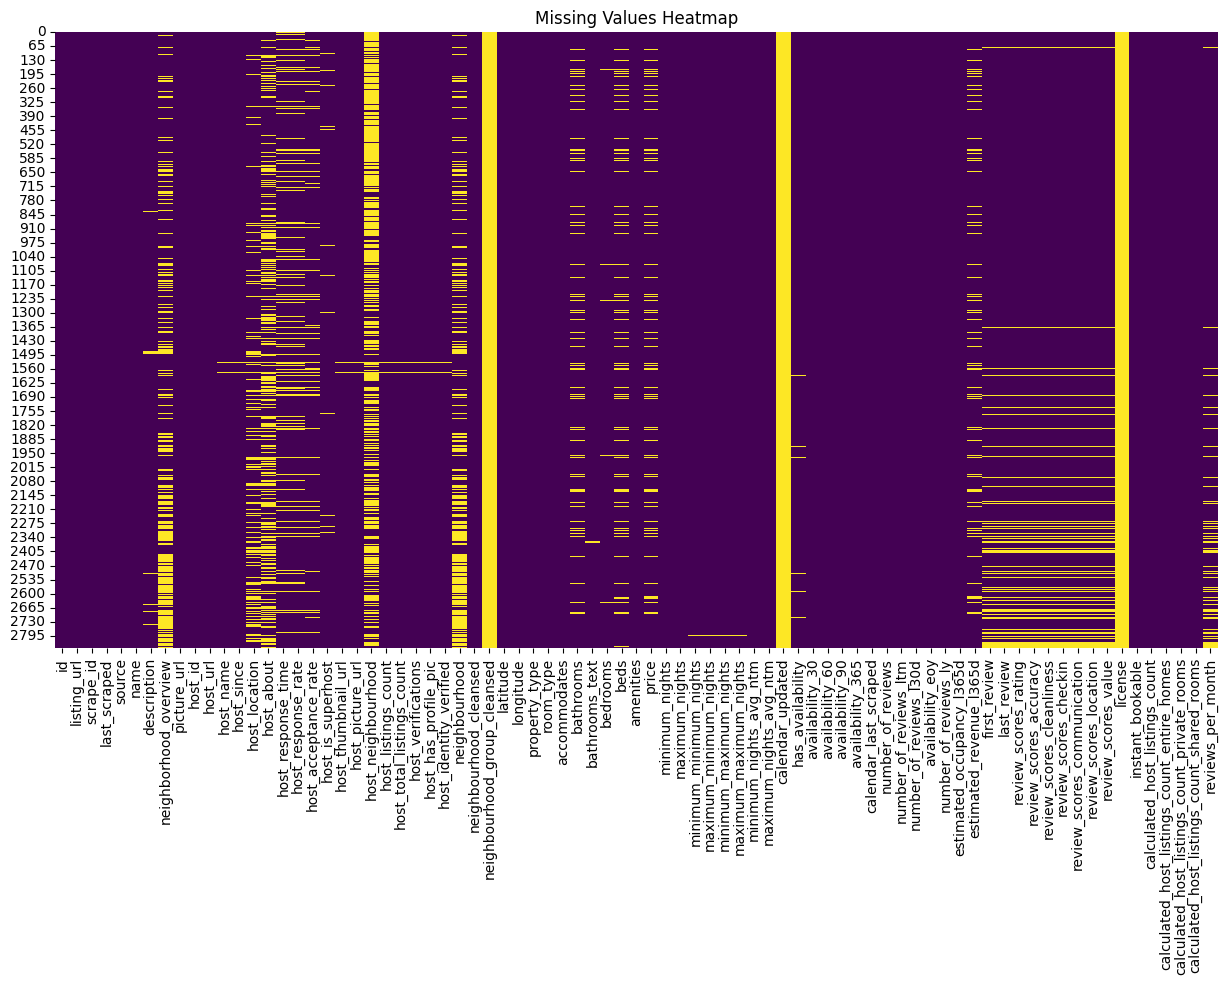

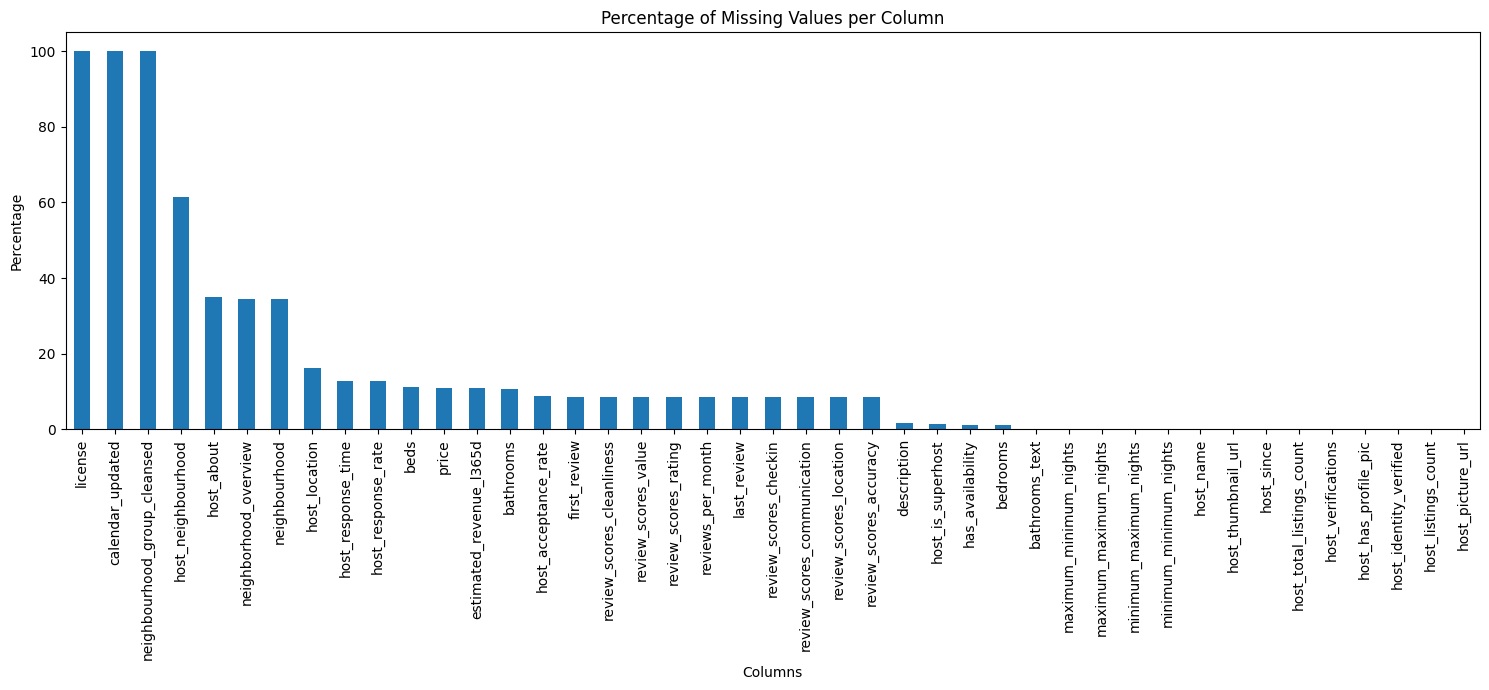

In [6]:
# Count null values for each column
missing_values = df.isnull().sum()
print("Missing values per column:")
pd.set_option('display.max_rows', None) # Temporarily set option to display all rows
print(missing_values)
pd.reset_option('display.max_rows') # Reset option to default

# Visualize missing values using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Bar chart of missing values percentage
plt.figure(figsize=(15, 7))
missing_percentage[missing_percentage > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1.license, calendar_updated, neighborhood_group_cleansed, these have no data at all. next up is host neighborhood with 60% of missing data

2. if there was valueable data in neighborhood group cleansed at all then it would cause issues as it seems like an important column to have overall to identify neighborhood listings cleanse - ness. Host neighborhood could be a key varaible to the data in assessing quality of the airbnb.

3. In this case since columns license, calendar_updates and neighborhood_group_cleansed virutally have no data they should be dropped since they wouldnt have any weight on the data regardless.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [11]:
columns_to_drop = ['license', 'calendar_updated', 'neighbourhood_group_cleansed', 'host_neighbourhood']
df = df.drop(columns=columns_to_drop, errors='ignore')

print("Columns dropped successfully. Displaying DataFrame info to confirm:")
df.info()

Columns dropped successfully. Displaying DataFrame info to confirm:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2852 non-null   int64  
 1   listing_url                                   2852 non-null   object 
 2   scrape_id                                     2852 non-null   int64  
 3   last_scraped                                  2852 non-null   object 
 4   source                                        2852 non-null   object 
 5   name                                          2852 non-null   object 
 6   description                                   2804 non-null   object 
 7   neighborhood_overview                         1872 non-null   object 
 8   picture_url                                   2852 non-null   object 


### ✍️ Your Response: 🔧
1. The columns i dropped were license, calendar updated, neighborhood_group_cleansed, and host_neighborhood

2. The first 3 had no data in them while the host_neighborhood was missing a substantial amount of data buy also doesnt carry much valuable information to the business problem as it is the hosts neighborhood, We have the column neighborhood which is much more helpful for the business problem

3. Leaving them in would add no valuable information and jsut be empty columns which would be a cause for confusion in the future.



## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [13]:
# To "reverse" the previous fillna and demonstrate flagging, we need to reload the dataframe
# because inplace=True modifies the DataFrame directly, losing original null positions.
df = pd.read_csv('/content/listings.csv.gz')
columns_to_drop = ['license', 'calendar_updated', 'neighbourhood_group_cleansed', 'host_neighbourhood']
df = df.drop(columns=columns_to_drop, errors='ignore')

print("DataFrame reloaded and columns re-dropped for demonstration of flagging.\n")

# 1. Flag and convert 'price' column (without filling NaNs in the price column itself)
# Remove '$' and ',' from 'price' and convert to numeric, coercing errors to NaN
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Create a flag for originally missing/unconvertible price values
df['price_missing_flag'] = df['price'].isnull()

# NOTE: We are NOT filling 'price' with 0 here, to leave original NaNs in the column.
print(f"Missing values in 'price' are now flagged in 'price_missing_flag'. Original NaNs in 'price' column are left as NaN.")

# 2. Flag and fill 'host_response_time' column
# Create a flag for originally missing host response times
df['host_response_time_missing_flag'] = df['host_response_time'].isnull()

# Fill the actual 'host_response_time' column with a categorical placeholder 'Unknown'
df['host_response_time'] = df['host_response_time'].fillna('Unknown')
print(f"Missing values in 'host_response_time' are now flagged in 'host_response_time_missing_flag'. Original NaNs filled with 'Unknown'.")

# Verify that missing values have been handled and flags created
print("\nMissing values after flagging and conversion (check new flag columns and original columns):\n")
print(df[['price', 'price_missing_flag', 'host_response_time', 'host_response_time_missing_flag']].isnull().sum())

# Display a few rows to show the new flag columns and price with NaNs
print("\nFirst 5 rows with new flag columns and potential NaNs in price:")
display(df[['price', 'price_missing_flag', 'host_response_time', 'host_response_time_missing_flag']].head())

DataFrame reloaded and columns re-dropped for demonstration of flagging.

Missing values in 'price' are now flagged in 'price_missing_flag'. Original NaNs in 'price' column filled with 0 to maintain numeric type for analysis.
Missing values in 'host_response_time' are now flagged in 'host_response_time_missing_flag'. Original NaNs filled with 'Unknown'.

Missing values after flagging and filling (check new flag columns and original columns):

price                              0
price_missing_flag                 0
host_response_time                 0
host_response_time_missing_flag    0
dtype: int64

First 5 rows with new flag columns:


,price,price_missing_flag,host_response_time,host_response_time_missing_flag
0,96.0,False,within an hour,False
1,44.0,False,within an hour,False
2,90.0,False,Unknown,True
3,62.0,False,within an hour,False
4,221.0,False,within an hour,False


### ✍️ Your Response: 🔧
1. I chose to clean price and host_response_time

2. I initally did filling in the values with median but then realized that that wouldnt make sense with the data I have since the medians would come from the entirety of the data set and not be specific to the id of the airbnb host so I reversed that and decided to just flag the data points.

3. Some of these attributes such as the ones I chose, price and host response time may be big factors that go into the quality of an airbnb. Ultimately if our target was price we would need to have all those price values to be known to run an analysis


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [17]:
# 1. Clean the 'price' column: remove '$' and ','
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# 2. Convert 'price' to numeric (float), coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')


print("Price column cleaned and converted to float.")
print(f"New data type of 'price' column: {df['price'].dtype}")

# Display summary statistics to check the cleaned column
print("\nSummary statistics for the cleaned 'price' column:")
print(df['price'].describe())

Price column cleaned and converted to float.
New data type of 'price' column: float64

Summary statistics for the cleaned 'price' column:
count    2852.000000
mean      174.693548
std       387.530015
min         0.000000
25%        80.000000
50%       121.000000
75%       198.000000
max      9999.000000
Name: price, dtype: float64


### ✍️ Your Response: 🔧
1. I fixed the price column

2. in the data set the $ and , were removed from data points which then allowed the column to convert to floatt

3. changing it to float helps use the data for accurate statistics

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [18]:
# 1. Check for and remove exact duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"Number of exact duplicate rows found: {duplicate_rows_count}")

if duplicate_rows_count > 0:
    df.drop_duplicates(inplace=True)
    print("Exact duplicate rows removed.")
else:
    print("No exact duplicate rows to remove.")

# 2. Check for and remove duplicate IDs
duplicate_ids_count = df['id'].duplicated().sum()
print(f"\nNumber of duplicate IDs found: {duplicate_ids_count}")

if duplicate_ids_count > 0:
    df.drop_duplicates(subset=['id'], inplace=True)
    print("Duplicate IDs removed, keeping the first occurrence.")
else:
    print("No duplicate IDs to remove.")

print(f"\nDataFrame shape after removing duplicates: {df.shape}")

Number of exact duplicate rows found: 0
No exact duplicate rows to remove.

Number of duplicate IDs found: 0
No duplicate IDs to remove.

DataFrame shape after removing duplicates: (2852, 77)


### ✍️ Your Response: 🔧 🔧
1. there were no excact duplicate rows

2. since there were none I dropped none

3. It can distort statsitics by making the data biased. If a certain number carries double the weight it will skew the data inaccurately

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [19]:
# Convert 'host_response_rate' to float
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=False)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce') / 100
print(f"'host_response_rate' converted to type: {df['host_response_rate'].dtype}")

# Convert 'host_acceptance_rate' to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace('%', '', regex=False)
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce') / 100
print(f"'host_acceptance_rate' converted to type: {df['host_acceptance_rate'].dtype}")

# Convert 'host_listings_count' to integer
# Fill NaN values with 0 before converting to integer
df['host_listings_count'] = df['host_listings_count'].fillna(0).astype(int)
print(f"'host_listings_count' converted to type: {df['host_listings_count'].dtype}")

# Convert 'host_total_listings_count' to integer
# Fill NaN values with 0 before converting to integer
df['host_total_listings_count'] = df['host_total_listings_count'].fillna(0).astype(int)
print(f"'host_total_listings_count' converted to type: {df['host_total_listings_count'].dtype}")

# Convert 'host_since' to datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
print(f"'host_since' converted to type: {df['host_since'].dtype}")

# Convert 'last_scraped' to datetime
df['last_scraped'] = pd.to_datetime(df['last_scraped'], errors='coerce')
print(f"'last_scraped' converted to type: {df['last_scraped'].dtype}")

# Display info to confirm changes
df.info()

'host_response_rate' converted to type: float64
'host_acceptance_rate' converted to type: float64
'host_listings_count' converted to type: int64
'host_total_listings_count' converted to type: int64
'host_since' converted to type: datetime64[ns]
'last_scraped' converted to type: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            2852 non-null   int64         
 1   listing_url                                   2852 non-null   object        
 2   scrape_id                                     2852 non-null   int64         
 3   last_scraped                                  2852 non-null   datetime64[ns]
 4   source                                        2852 non-null   object        
 5   name                

In [20]:
df.to_csv("cleaned_airbnb_data_6.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. What was most surprising/ challenging while cleaning this dataset figuring out how and whether changing the data type would affect my flagged values. I wasa bit confused on how that aspect worked since i flagged the data then changed the data type.
2. I dedicded to drop some columns as they had no data at all which made it easy while other had a substantial amount of data missing making it almost impossible to use. I kept most of the data as they were missing values but it wasnt a substanial amount and it was data that could be flagged.  
3. One way a business team may benefit from this clean version of data is that it may be easier to analyze with more accurate results. Ultimately they are looking for a target but with inaccurate numbers or data their conclusions may be swayed
4. If i had more time to explore this dataset I would look more into the missing values seeing if there was any way that they could be filled with meaningful but accurate data. This would ultimately add more to the value of this dataset.
5. This related to my customized learning outcome i created on canvas as I want to be able to give accurate informationa with a good concious as per my learning outcomes says. This helped me learn the difficulties and intricacies of cleaning data and the difference it can make.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [22]:
!jupyter nbconvert --to html "assignment_06_VegaSamantha.ipynb"

[NbConvertApp] Converting notebook assignment_06_VegaSamantha.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 738718 bytes to assignment_06_VegaSamantha.html
